In [2]:
"""
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 -V || python -V

Python 3.11.4


In [1]:
from _requirements import *

## Simulation: Numerical validation of Proposition 1 

In [2]:
## Parameters #####

# Reference shape
p_star = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square
n = p_star.shape[0]

## Generate the simulation frames #####
tf = 2
h = 5

args = {
    "Z"     : ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1)), 
    "p_star": p_star,
    "p0"    : [[-9,-3], [-5,-5], [0,4], [0,-5]],
    "tf"    : tf, 
    "h"     : h,
    "kappa" : 1, 
}

sim_fr = AffineComplexSimulator(**args)
sim_fr.check_W_L(eigenvectors=False)

## Design the parameters of a body-fixed desired velocity in S #####
params = [1, 0, 0, 0, 0, 0]
check_case(sim_fr, params, debug=True)

Failed to dualize the problem: 'float' object is not iterable
W (6, 6) = 
 [[ 0.25  0.    0.    0.    0.    0.  ]
 [ 0.   -0.25  0.    0.    0.    0.  ]
 [ 0.    0.    0.25  0.    0.    0.  ]
 [ 0.    0.    0.   -0.25  0.    0.  ]
 [ 0.    0.    0.    0.    0.25  0.  ]
 [ 0.    0.    0.    0.    0.    0.25]]
L (4, 4) = 
 [[ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]
 [ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]]
 --- Eigenvalues
lambda_0 = -0.000000+0.000000j
lambda_1 = -1.000000+0.000000j
lambda_2 = -0.000000+0.000000j
lambda_3 = -0.000000+0.000000j
------------- -> C3 (hxw == 0 and hyw == 0)
l+ = 0j  | l- = 0j
hx - w = 0  | hy + w = 0
vx = 1  | vy = 0
------------- 


In [3]:
## Design M #####
# Set the parameters
vx, vy, a, omega, hx, hy = params

# Design the weights that gerenates the body-fixed desired velocity v_f^*
mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
mu_matrix_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

mu_matrix_a = np.array([[0,1,0,1], [1,0,1,0], [0,1,0,1], [1,0,1,0]])/2
mu_matrix_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
mu_matrix_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
mu_matrix_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

# Pass the weights to the simulation frame, it will compute M and L_mod
sim_fr.set_manual_mu(
    vx*mu_matrix_x + vy*mu_matrix_y + 
    a*mu_matrix_a + omega*mu_matrix_w + 
    hx*mu_matrix_hx + hy*mu_matrix_hy
)

## Calculate the lower bound of h (h_l) #####
sim_fr.check_MBT(eigenvectors=False)
hl = sim_fr.kappa * 1 # maximum eigenvalue (from previous print)
print(f"\n{hl=}\n")

## Launch the simulation #####
sim_fr.numerical_simulation()


 -> (M @ B.T).H @ (M @ B.T)
 --- Eigenvalues
lambda_0 = 1.000000
lambda_1 = 0.000000
lambda_2 = 1.000000
lambda_3 = 0.000000

hl=1



Executing numerical simulation: 100%|██████████| 2000/2000 [00:00<00:00, 33767.71it/s]


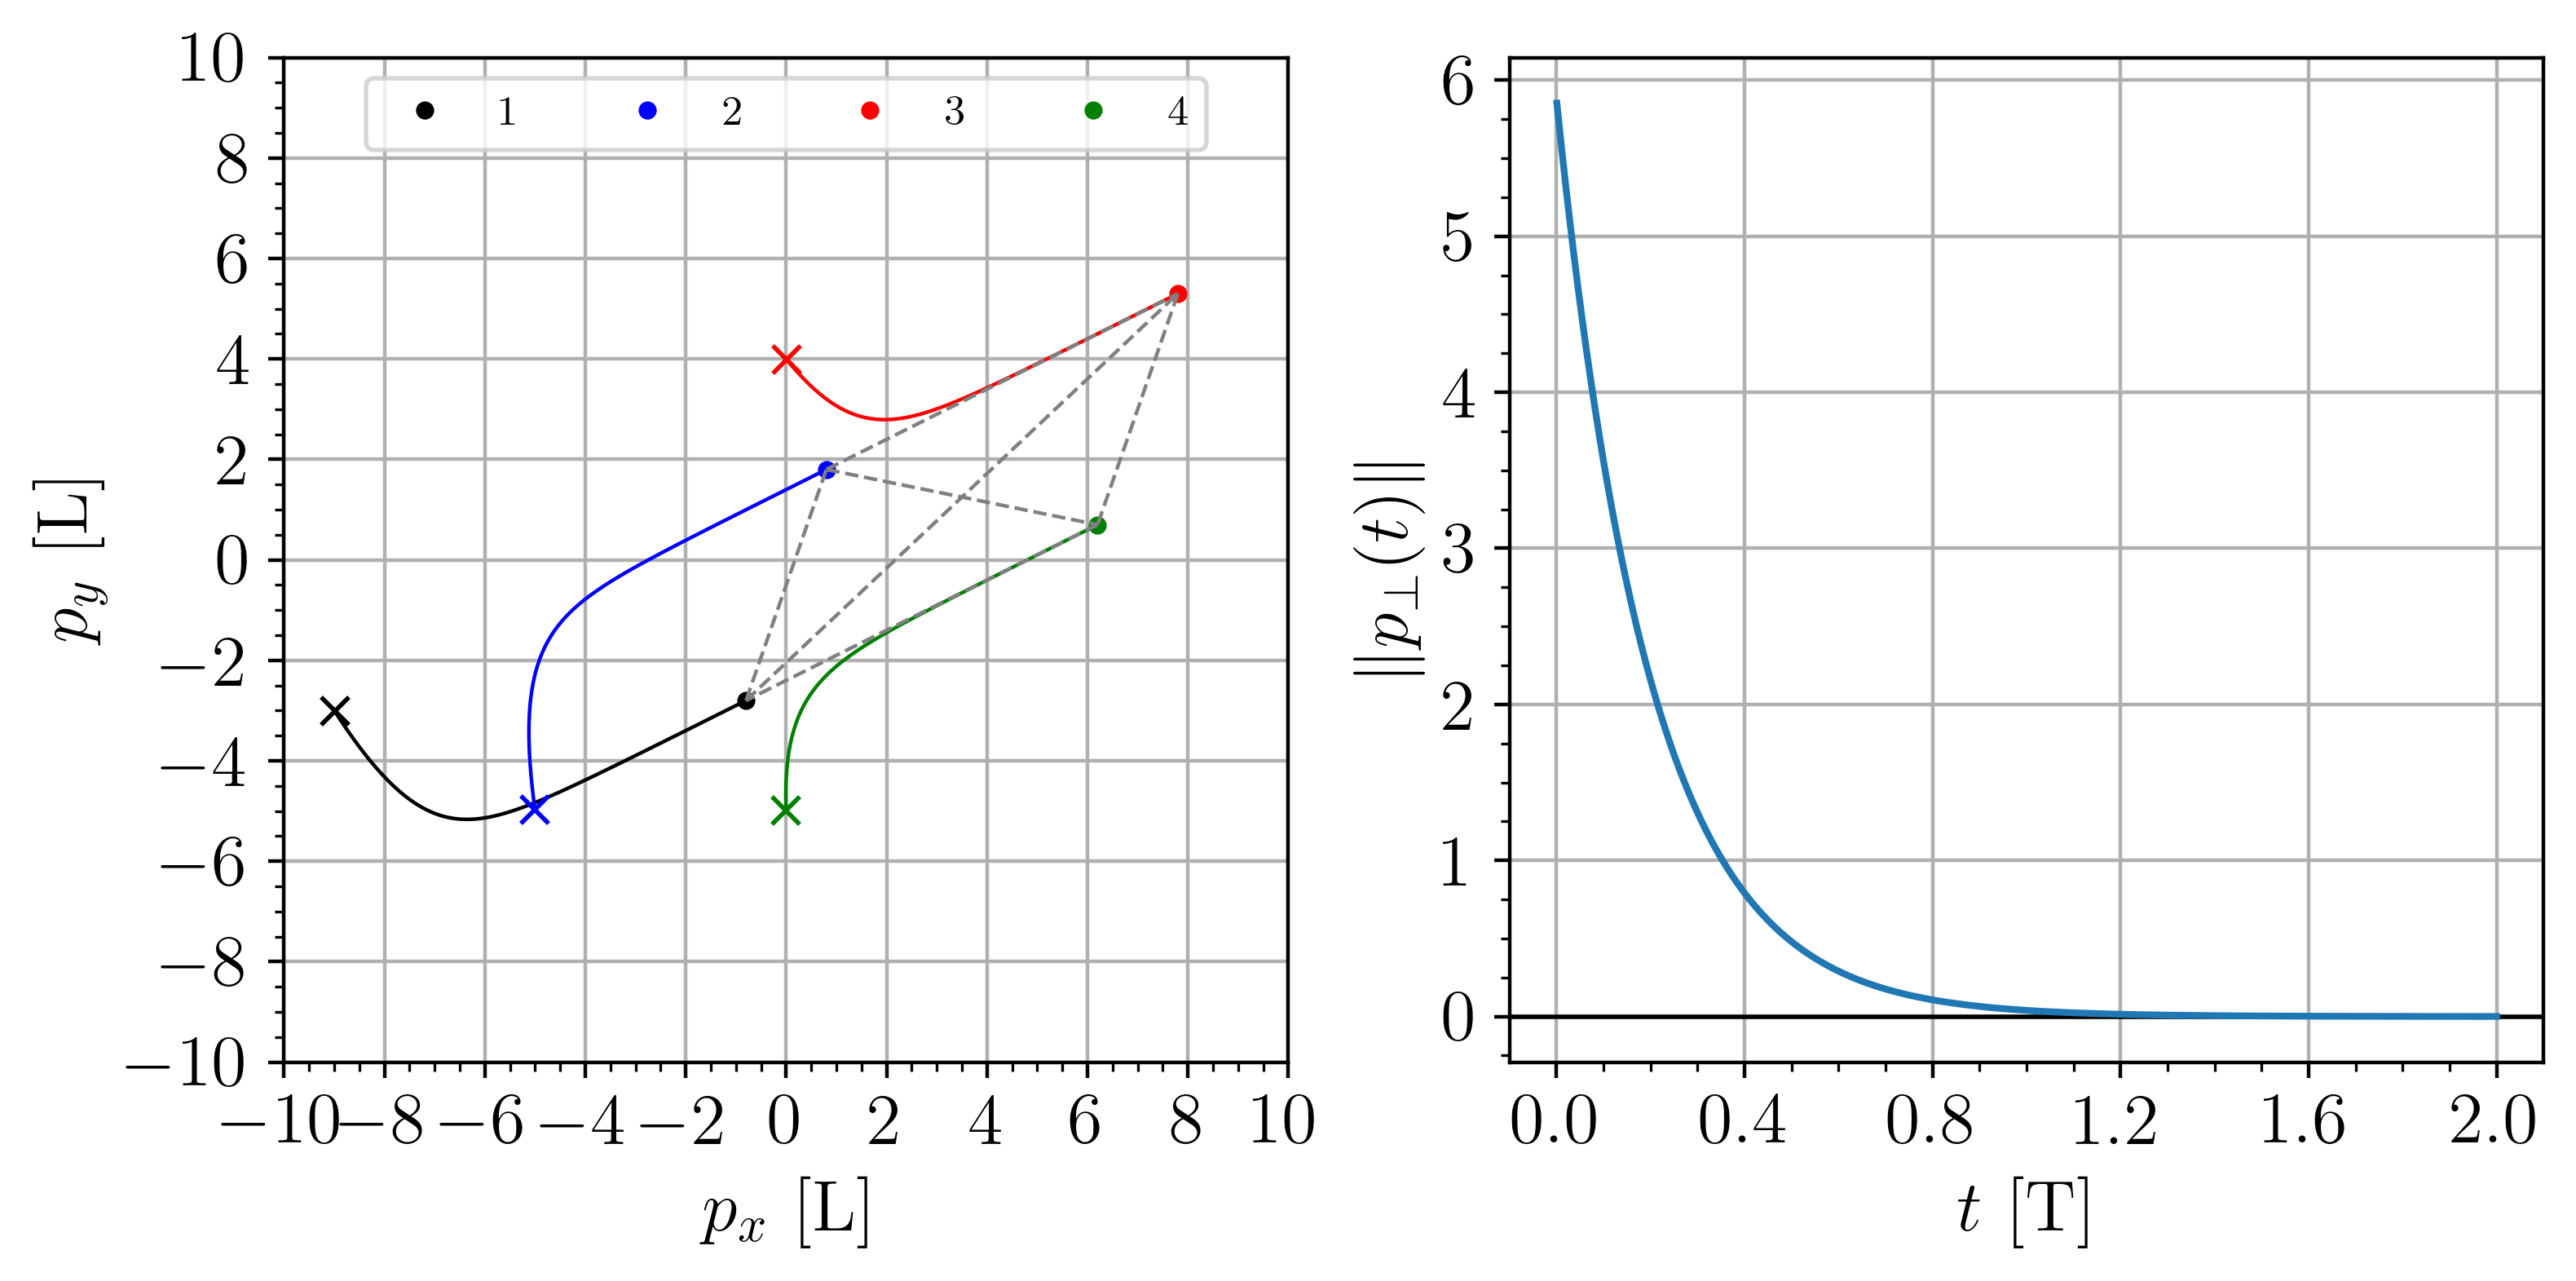

In [4]:
## Generate the paper plot ####

# Init figure and config axes
fig = plt.figure(figsize=(9,4), dpi=400)
ax1, ax2 = fig.subplots(1,2)

config_data_axis(ax1, 2, 2, y_right=False)
config_data_axis(ax2, 0.4, 1, y_right=False)

lim = 10
ax1.set_xlim([-lim, lim])
ax1.set_ylim([-lim, lim])
ax1.grid(True)
ax1.set_aspect("equal")
ax1.set_xlabel(r"$p_x$ [L]")
ax1.set_ylabel(r"$p_y$  [L]")

ax2.grid(True)
ax1.set_aspect("equal")
ax2.set_xlabel(r"$t$ [T]")
ax2.set_ylabel(r"$\|p_\perp(t)\|$")

# Axis: X-Y
sim_fr.plot(ax1)
ax1.legend(ncols=4, fontsize="xx-small", loc="upper center")

# Axis: ||p_perp||
ax2.axhline(0, c="k", lw=1)
ax2.plot(sim_fr.data["t"], sim_fr.data["p_perp_norm"])

plt.show()


## Simulation: Numerical validation of Proposition 2

In [3]:
## Generate the simulation frame #####

# Reference shape
p_star = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square

args = {
    "Z"     : ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1)),
    "p_star": p_star,
    "p0"    : p_star, # temp
    "tf"    : 4, 
    "h"     : 1,
    "kappa" : 1, #tmp
}

sim_fr = AffineComplexSimulator(**args)

Failed to dualize the problem: 'float' object is not iterable


In [4]:
## Design parameters for the body-fixed desired velocity in S #####

# mu_ij weights for the given p_star and Z --------------------------------------------
def get_M(params):
    mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
    mu_matrix_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    mu_matrix_a = np.array([[0,1,0,1], [1,0,1,0], [0,1,0,1], [1,0,1,0]])/2
    mu_matrix_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
    mu_matrix_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
    mu_matrix_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    vx, vy, a, omega, hx, hy = params

    M = vx*mu_matrix_x + vy*mu_matrix_y + a*mu_matrix_a + omega*mu_matrix_w
    M += hx*mu_matrix_hx + hy*mu_matrix_hy
    return M
# -------------------------------------------------------------------------------------

# Parameters examples -----------------------------------------------------------------
# C1
params_deg_c1 = [1, 0, 0, 2, 1, 0]

# C2
params_deg_c2 = [2, 0, -1, -1, -2, 0]

# C3
params_deg_c3a = [1, 1, 0, 0, 0, 0]
params_deg_c3b = [1, 0, 0, 0, 4, 0]
params_deg_c3c = [0, 1, 0, 0, 0, 1]

# C4
params_deg_c4a = [1, 0, 0, 0, 0, 1]
params_deg_c4b = [0, 1, 0, 0, 1, 0]
# -------------------------------------------------------------------------------------

params_c1 = params_deg_c1
params_c2 = params_deg_c2
params_c3 = params_deg_c3c
params_c4 = params_deg_c4a

check_case(sim_fr, params_c1, debug=True)
check_case(sim_fr, params_c2, debug=True)
check_case(sim_fr, params_c3, debug=True)
check_case(sim_fr, params_c4, debug=True)

------------- -> C1
l+ = 1.4142135623730951j  | l- = -1.4142135623730951j
hx - w = -1  | hy + w = 2
vx = 1  | vy = 0
------------- 
------------- -> C2
l+ = 0j  | l- = (-2+0j)
hx - w = -1  | hy + w = -1
vx = 2  | vy = 0
------------- 
------------- -> C3 (vx == 0, hxw == 0)
l+ = 0j  | l- = 0j
hx - w = 0  | hy + w = 1
vx = 0  | vy = 1
------------- 
------------- -> C4 (vx != 0, hyw != 0)
l+ = 0j  | l- = 0j
hx - w = 0  | hy + w = 1
vx = 1  | vy = 0
------------- 


Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 58503.47it/s]


sim_fr.x0=array([-10.48528137-8.82842712j,  -2.        -6.j        ,
         2.        +6.j        ,  -6.48528137+3.17157288j])
params=[1, 0, 0, 2, 1, 0], alphas_list=[0, 1, 3j], kappa=0.5 



Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 87277.24it/s]


sim_fr.x0=array([13.4+15.j, 11.4 +5.j, -6.6 -5.j, -4.6 +5.j])
params=[2, 0, -1, -1, -2, 0], alphas_list=[4, 4, (5+5j)], kappa=0.2 



Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 68231.96it/s]


sim_fr.x0=array([ 0.-4.j, -4.+0.j,  0.+4.j,  4.+0.j])
params=[0, 1, 0, 0, 0, 1], alphas_list=[1, 2j, (2+2j)], kappa=0.8 



Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 99276.40it/s]


sim_fr.x0=array([ 2.7-2.21j, -1.3-2.21j, -1.3+3.19j,  2.7+3.19j])
params=[1, 0, 0, 0, 0, 1], alphas_list=[1, 1, 2j], kappa=0.7 



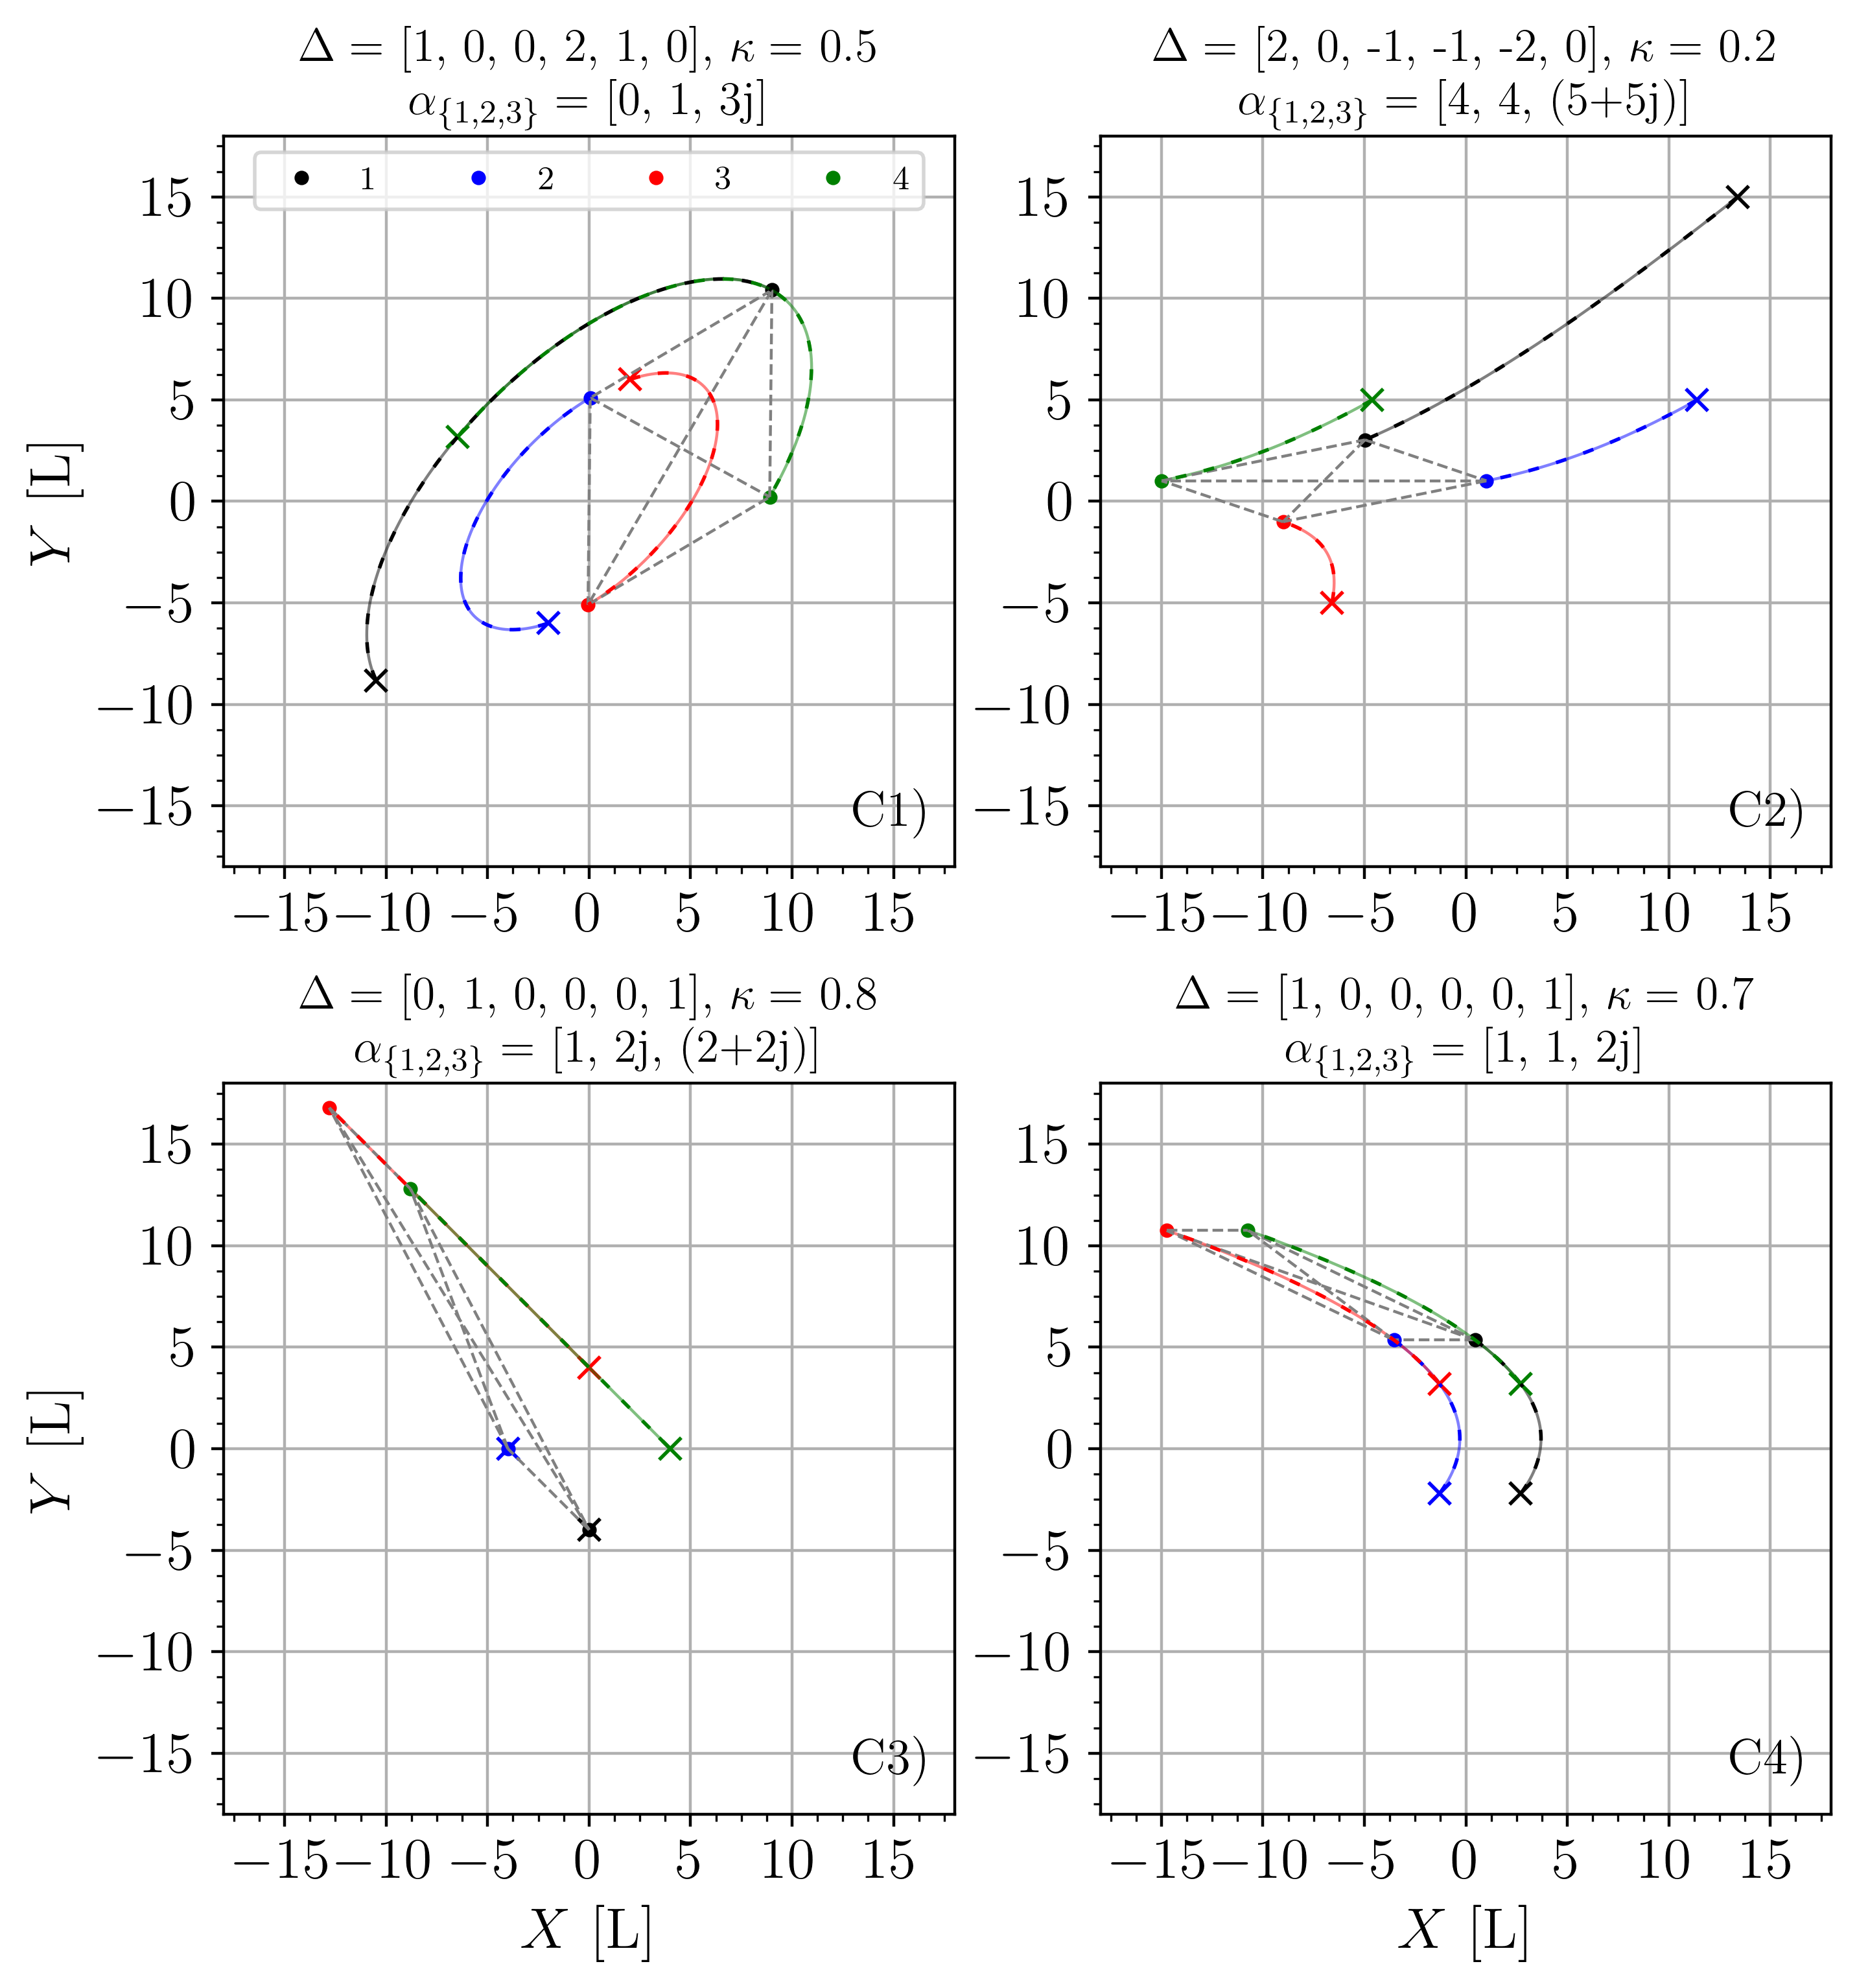

In [25]:
## Execute the simulations and extract the plot data #####

def plot_case(params, alphas_list, ax, kappa):
    sim_fr.kappa = kappa
    
    # Calculate the initial condition for the given alphas
    pt = get_pt_parallel(sim_fr, params, alphas_list)
    p0 = pt(0)
    sim_fr.x0 = p0

    # Set the matrix M and kappa
    sim_fr.set_manual_mu(get_M(params))
    
    # Launch the numerical simulation and plot
    sim_fr.numerical_simulation()
    sim_fr.plot(ax, alpha1=0.5, alpha2=1)

    # Plot the analytical solution
    t_list = np.linspace(0, sim_fr.tf, 100)
    pt_eval = np.zeros((len(t_list), sim_fr.n), dtype=complex)

    for i,t in enumerate(t_list):
        pt_eval[i,:] = pt(t)

    for i in range(sim_fr.n):
        ax.plot(
            np.real(pt_eval[:,i]), 
            np.imag(pt_eval[:,i]), 
            c=COLORS[i], ls="--", lw=1, dashes=(3, 5)
        )
    
    print(f"{sim_fr.x0=}")
    print(f"{params=}, {alphas_list=}, {kappa=} \n")
    
kappa1, kappa2, kappa3, kappa4 = 0.5, 0.2, 0.8, 0.7

alphas1 = [0,1,3j]
alphas2 = [4,4,5+5j]
alphas3 = [1,2j,2+2j]
alphas4 = [1,1,2j]

# Generate and configure the plot -----------------------------------------------------
fig = plt.figure(figsize=(8,8.7), dpi=400)
axes = fig.subplots(2,2)
ax1, ax2, ax3, ax4 = axes.flatten()

lim1, lim2, lim3, lim4 = 18, 18, 18, 18
config_data_axis(ax1, 5, 5, y_right=False, xlims=[-lim1,lim1], ylims=[-lim1,lim1])
config_data_axis(ax2, 5, 5, y_right=False, xlims=[-lim2,lim2], ylims=[-lim2,lim2])
config_data_axis(ax3, 5, 5, y_right=False, xlims=[-lim3,lim3], ylims=[-lim3,lim3])
config_data_axis(ax4, 5, 5, y_right=False, xlims=[-lim4,lim4], ylims=[-lim4,lim4])

ax1.set_aspect("equal")
ax2.set_aspect("equal")
ax3.set_aspect("equal")
ax4.set_aspect("equal")

ax1.set_ylabel(r"$Y$ [L]")
ax3.set_ylabel(r"$Y$ [L]")
ax3.set_xlabel(r"$X$ [L]")
ax4.set_xlabel(r"$X$ [L]")

ax1.text(13, -16, "C1)", fontdict={"size":14}, weight="bold")
ax2.text(13, -16, "C2)", fontdict={"size":14}, weight="bold")
ax3.text(13, -16, "C3)", fontdict={"size":14}, weight="bold")
ax4.text(13, -16, "C4)", fontdict={"size":14}, weight="bold")

title1 = r"$\Delta =$ " + str(params_c1) + r", $\kappa =$ " + str(kappa1) + "\n"
title1 = title1 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas1)
title2 = r"$\Delta =$ " + str(params_c2) + r", $\kappa =$ " + str(kappa2) + "\n"
title2 = title2 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas2)
title3 = r"$\Delta =$ " + str(params_c3) + r", $\kappa =$ " + str(kappa3) + "\n"
title3 = title3 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas3)
title4 = r"$\Delta =$ " + str(params_c4) + r", $\kappa =$ " + str(kappa4) + "\n"
title4 = title4 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas4)

ax1.set_title(title1, fontdict={"size":13})
ax2.set_title(title2, fontdict={"size":13})
ax3.set_title(title3, fontdict={"size":13})
ax4.set_title(title4, fontdict={"size":13})

# -------------------------------------------------------------------------------------

# Execute the simulations and extract the plot data -----------------------------------
plot_case(params_c1, alphas1, ax1, kappa1)
plot_case(params_c2, alphas2, ax2, kappa2)
plot_case(params_c3, alphas3, ax3, kappa3)
plot_case(params_c4, alphas4, ax4, kappa4)

ax1.legend(ncols=4, fontsize="xx-small", loc="upper center")
# -------------------------------------------------------------------------------------

plt.show()